<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/tf2ss_chapter_6_example_6_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.8 MB/s eta 0:00:00


In [9]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss2tf, ss
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


 10 s^2 - 60 s - 110
----------------------
s^3 - 6 s^2 - 7 s - 52

Poles =  [ 7.76418118+0.j         -0.88209059+2.43296907j -0.88209059-2.43296907j]
Zeros =  [ 7.47213595+0.j -1.47213595+0.j]


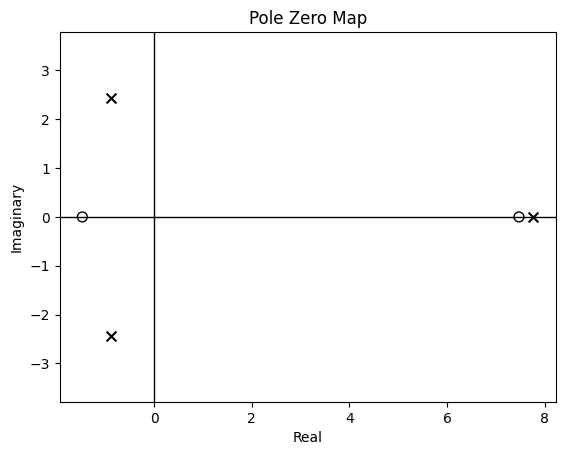

In [10]:
# Define your system in state space
A = np.array([[0, 3, 1],[2, 8, 1],[-10, -5, -2]])
B = np.array([[10],[0],[0]])
C = np.array([[1, 0, 0]])
D = np.array([[0]])

sys = ss(A, B, C, D)
TF = ss2tf(sys)

print(TF)

(p,z) = pzmap(TF)
print("Poles = ",p)
print("Zeros = ",z)

plt.savefig ("poles_zeros.pdf")

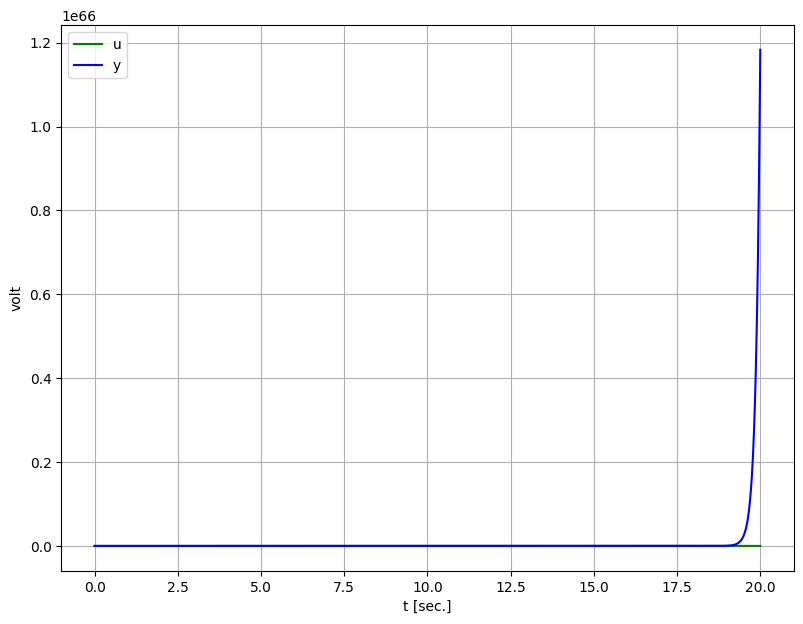

In [11]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")